In [2]:
import pandas as pd 
import numpy as np 
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
INPUT_PATH = '../../data/feature_extraction/anglecalc.csv'

df = pd.read_csv(INPUT_PATH)

df = df.drop(columns=['shortwave_radiation_w/m2', 'specific_energy_kwh/kwp', 'latitude', 'longitude', 'connection_power_kwh', 'relative_humidity_2m_%', 'dew_point_2m_celsius', 'apparent_temperature_celsius', 'wind_speed_10m_km/h', 'wind_direction_10m_degree'])

df.head()

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315567 entries, 0 to 315566
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    315567 non-null  object 
 1   produced_energy_kwh     315567 non-null  float64
 2   serial_number           315567 non-null  int64  
 3   location                315567 non-null  object 
 4   installed_power_kwp     315567 non-null  float64
 5   temperature_2m_celsius  315567 non-null  float64
 6   cloud_cover_%           315567 non-null  int64  
 7   solar_azimuth           315567 non-null  float64
 8   solar_zenith            315567 non-null  float64
 9   solar_altitude          315567 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 24.1+ MB
None


In [4]:

df['date'] = pd.to_datetime(df['date'])

model = LinearRegression()
serial_number = df['serial_number'].unique()
count_serial_number = len(serial_number)
print(f"Anzahl der Seriennummern: {count_serial_number}")

Anzahl der Seriennummern: 9


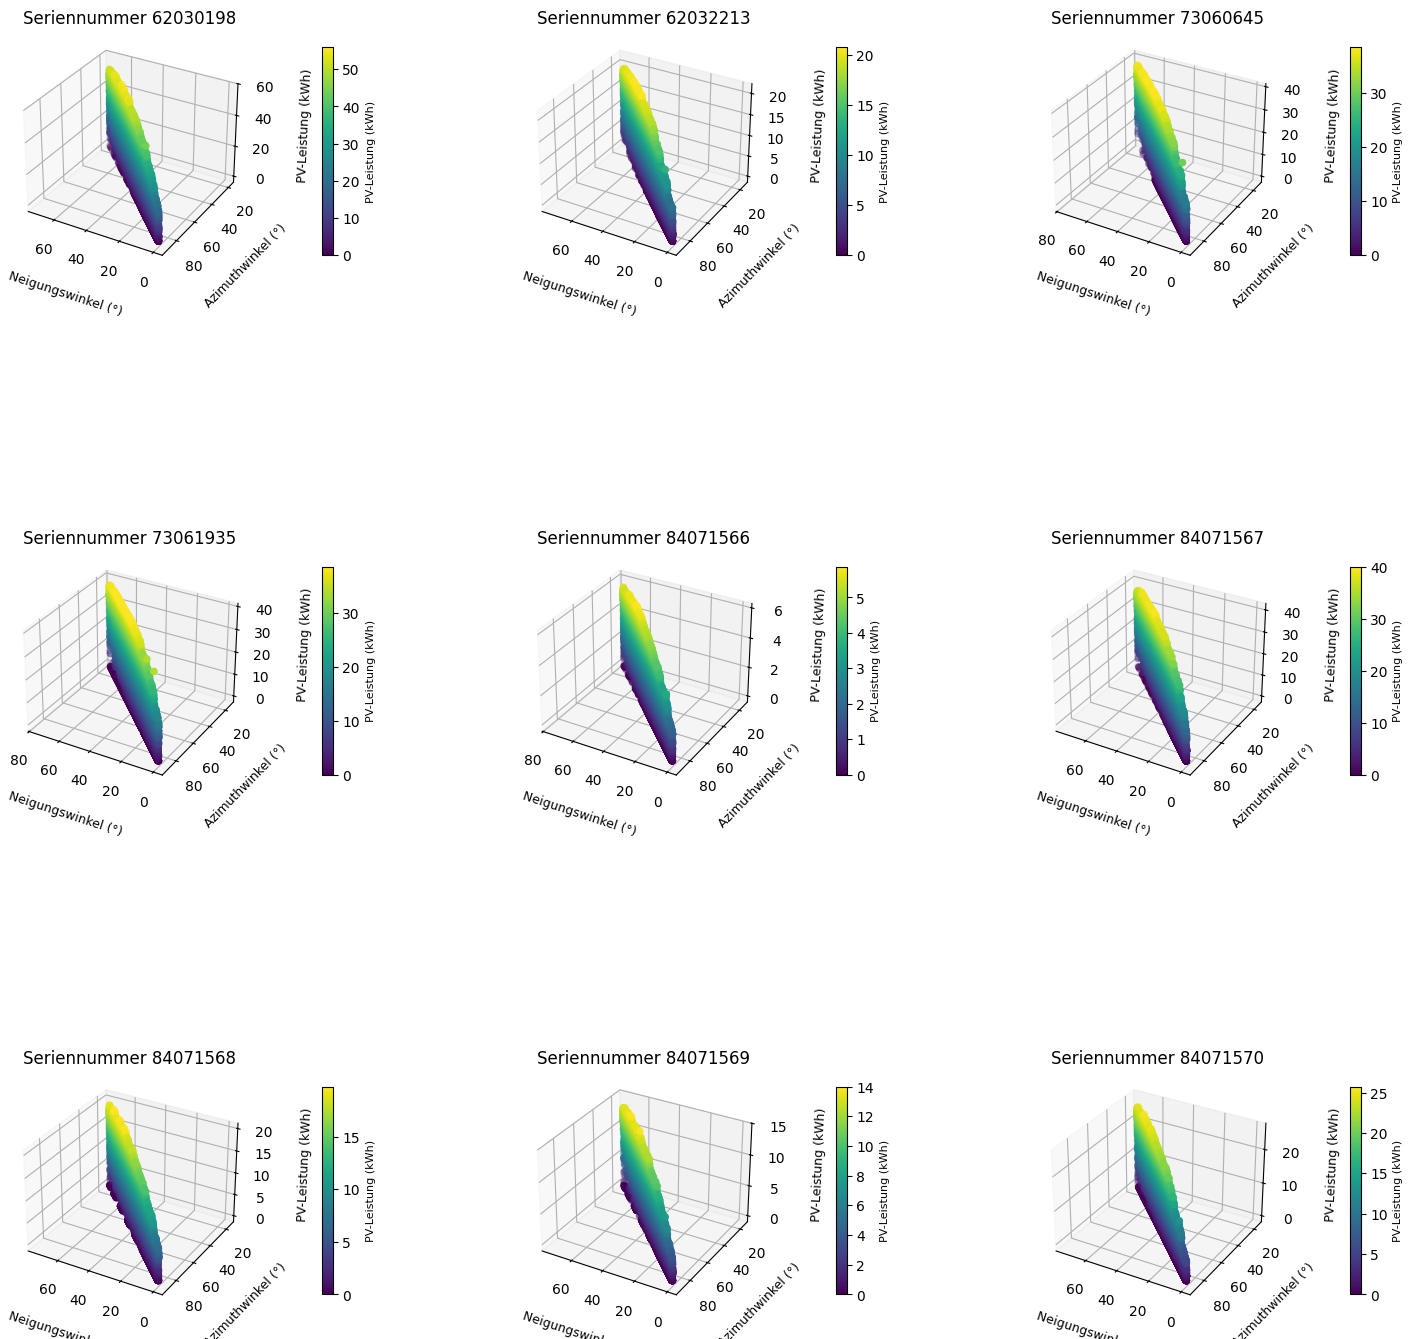

In [6]:
fig = plt.figure(figsize=(18, 18))
ncols, nrows = 3, 3


for idx, (serial_number, gruppe) in enumerate(df.groupby('serial_number')):
    if idx >= count_serial_number:  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    gruppe = gruppe[(gruppe['solar_altitude'] > 0) & (gruppe['solar_zenith'] > 0)]

    if gruppe.empty:
        continue

    
    ax = fig.add_subplot(nrows, ncols, idx + 1, projection='3d')
    
    x = gruppe['solar_altitude'].values

    y = gruppe['solar_zenith'].values
    
    z = gruppe['produced_energy_kwh'].values

    
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=20)

    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Neigungswinkel (°)", fontsize = 9, labelpad = 10)
    ax.set_ylabel("Azimuthwinkel (°)", fontsize = 9, labelpad = 10)
    ax.set_zlabel("PV-Leistung (kWh)", fontsize = 9, labelpad = 10)

    ax.view_init(elev=30, azim=120)  # Höhe und Drehwinkel der Kamera

    cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.2)
    cbar.set_label("PV-Leistung (kWh)", fontsize=8)
  
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Horizontaler und vertikaler Abstand

plt.show()




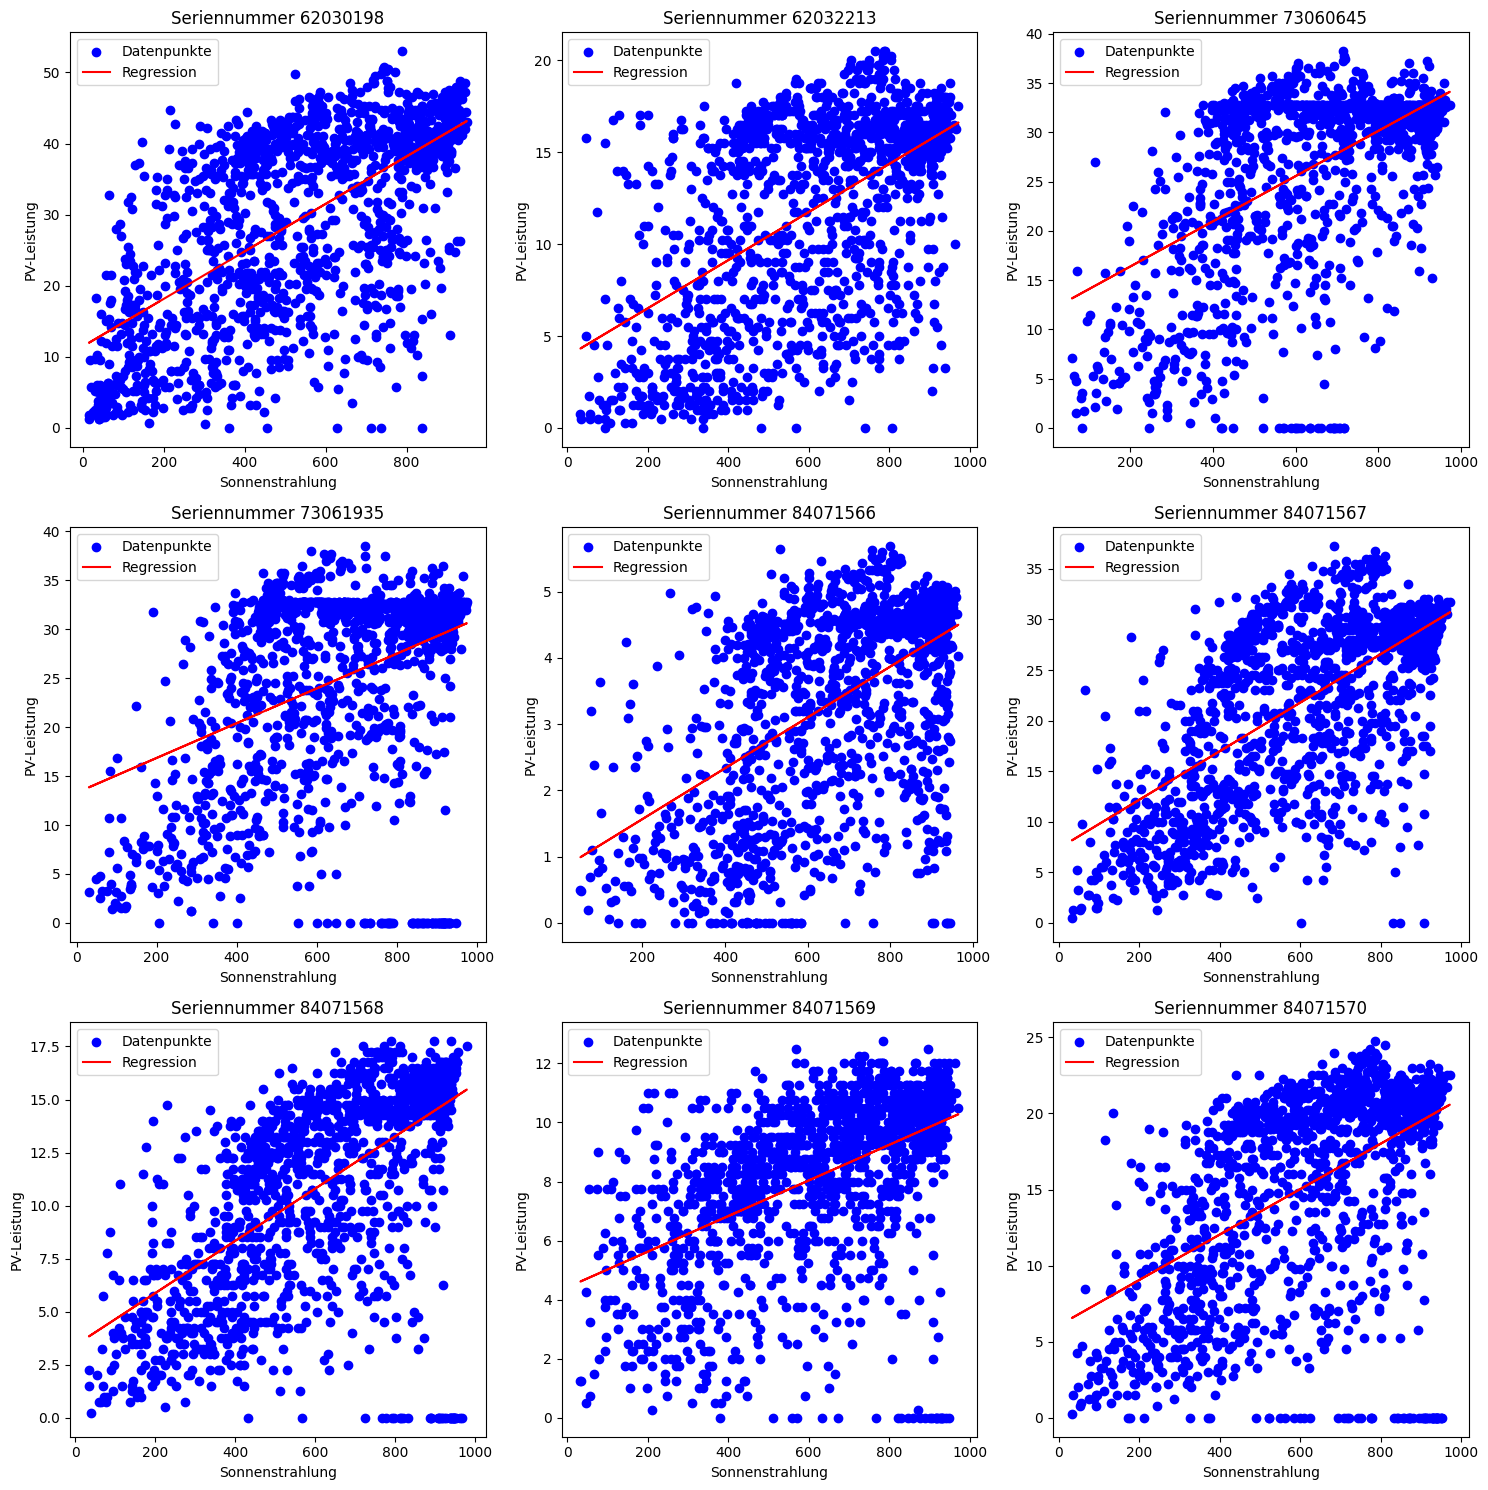

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (serial_number, gruppe) in enumerate(df_12pm.groupby('serial_number')):
    if idx >= len(axes):  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    ax = axes[idx]

    X = gruppe['shortwave_radiation_w/m2'].values.reshape(-1, 1)
    y = gruppe['produced_energy_kwh'].values

    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatterplot und Regressionslinie
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, y_pred, color='red', label='Regression')
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Sonnenstrahlung")
    ax.set_ylabel("PV-Leistung")
    ax.legend()

# Unbenutzte Plots ausblenden
for idx in range(count_serial_number, len(axes)):
    fig.delaxes(axes[idx])

# Layout optimieren
plt.tight_layout()
plt.show()

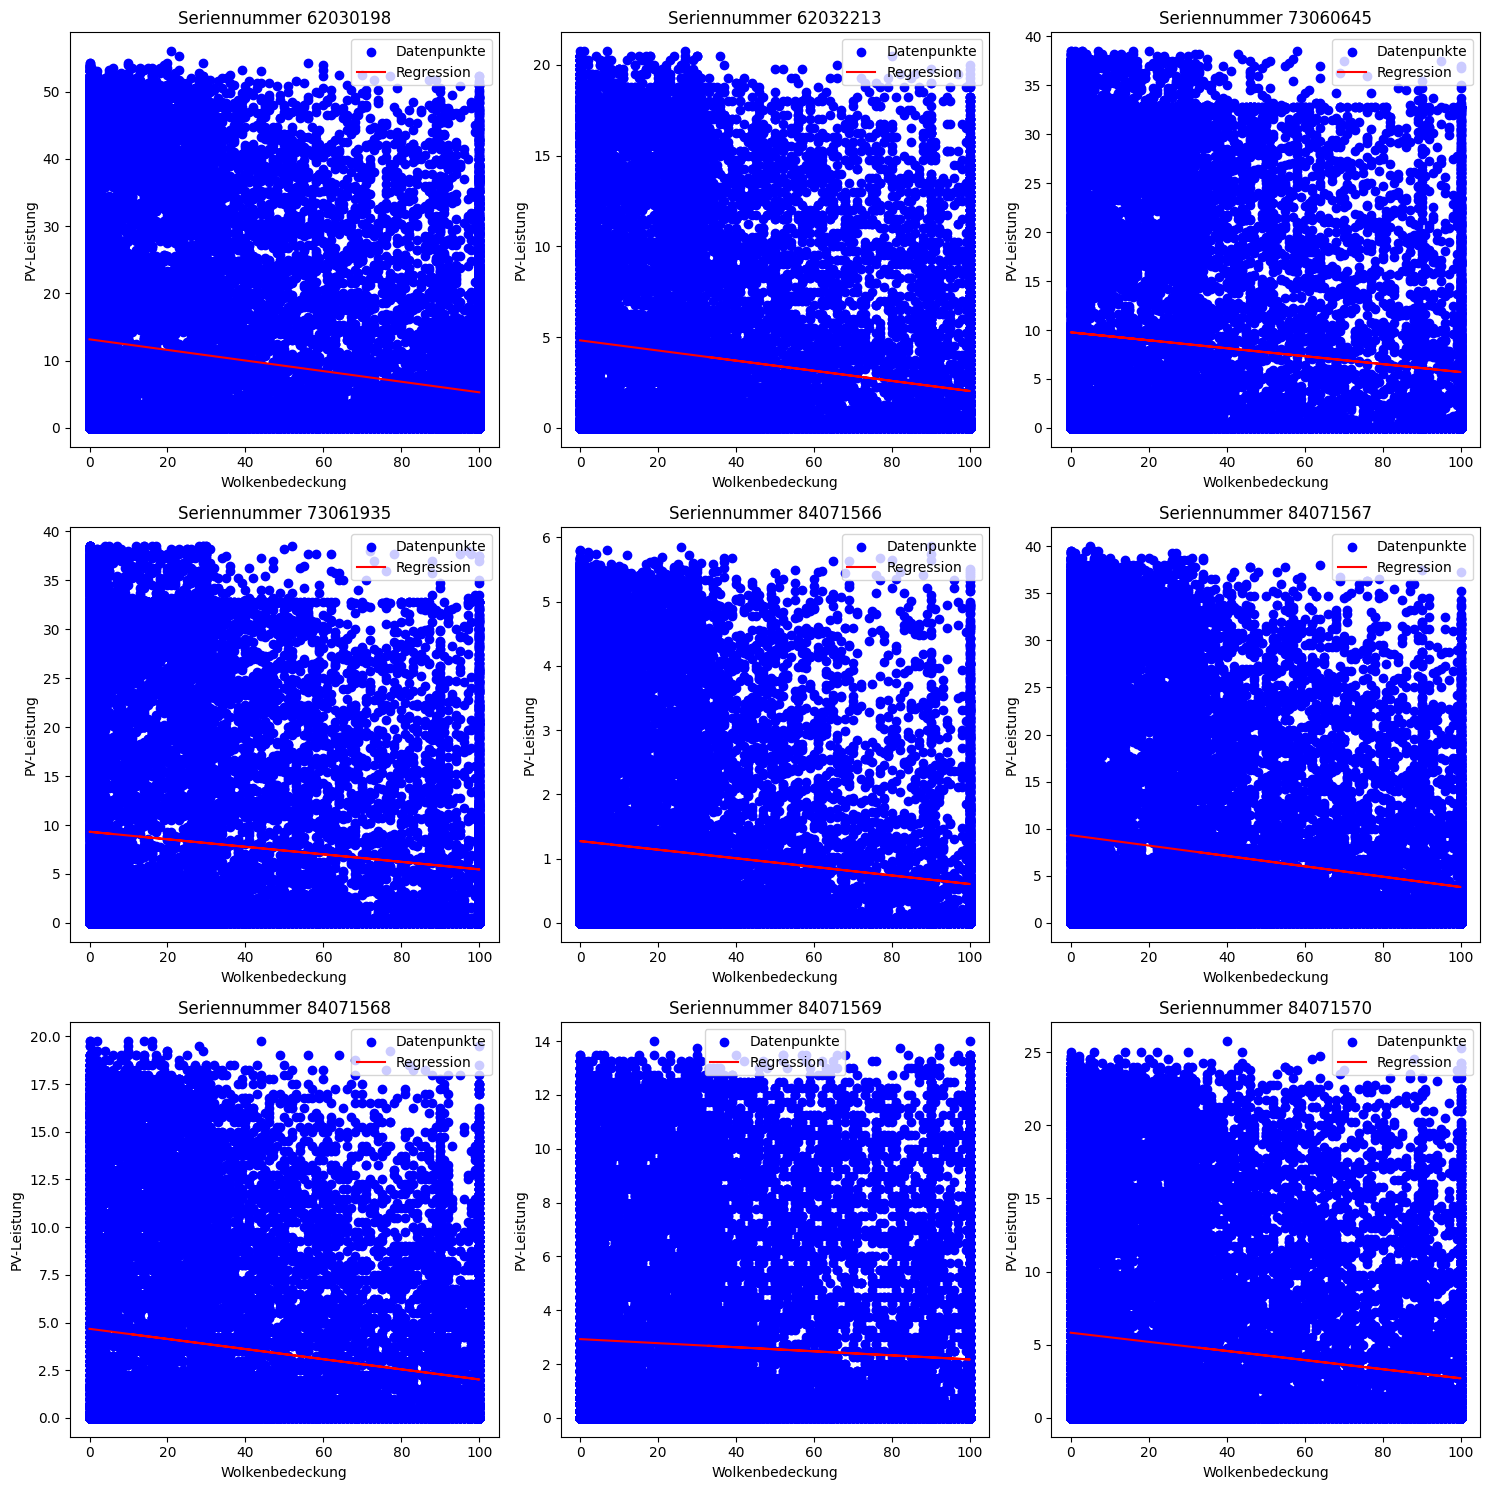

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (serial_number, gruppe) in enumerate(df.groupby('serial_number')):
    if idx >= len(axes):  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    ax = axes[idx]

    X = gruppe['cloud_cover_%'].values.reshape(-1, 1)
    y = gruppe['produced_energy_kwh'].values

    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatterplot und Regressionslinie
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, y_pred, color='red', label='Regression')
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Wolkenbedeckung")
    ax.set_ylabel("PV-Leistung")
    ax.legend()
# Unbenutzte Plots ausblenden
for idx in range(count_serial_number, len(axes)):
    fig.delaxes(axes[idx])

# Layout optimieren
plt.tight_layout()
plt.show()

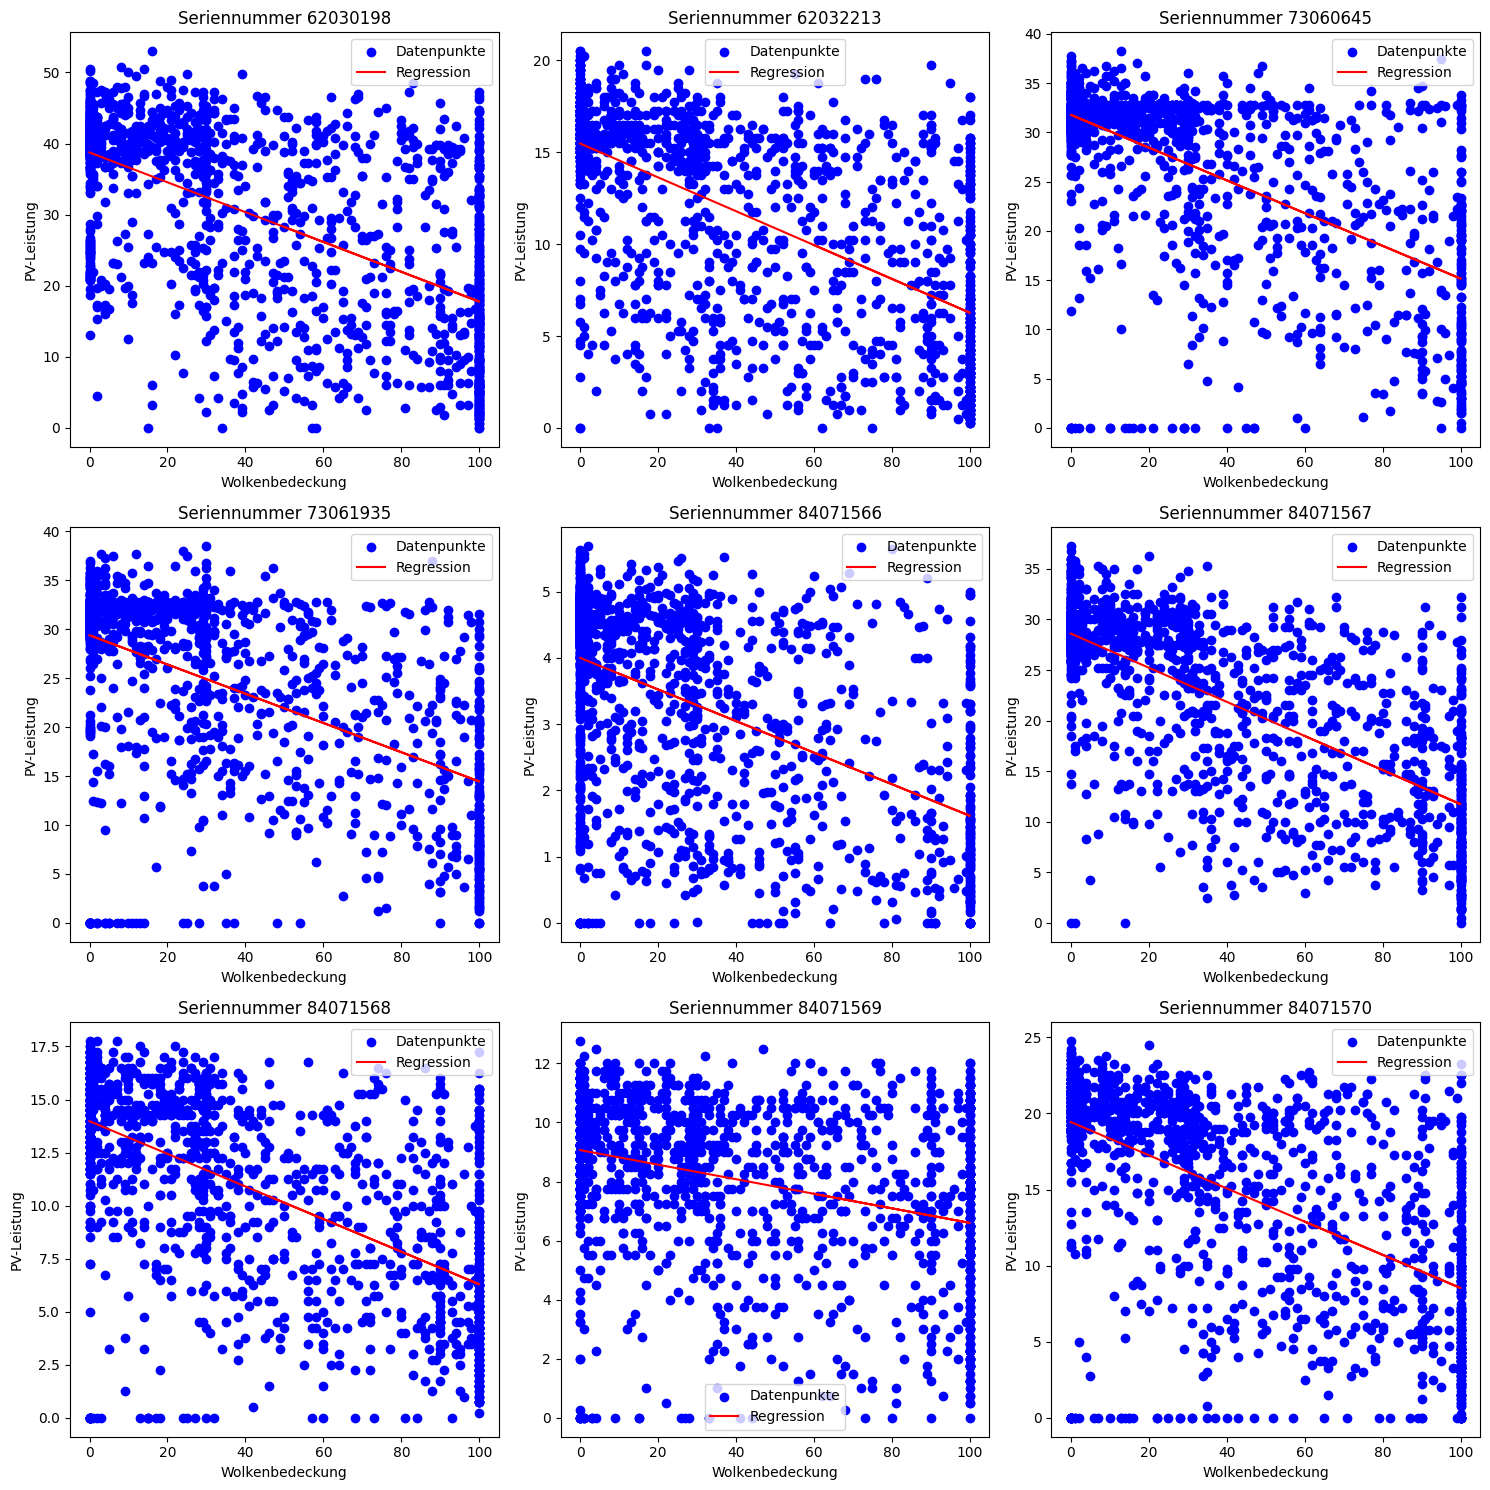

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (serial_number, gruppe) in enumerate(df_12pm.groupby('serial_number')):
    if idx >= len(axes):  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    ax = axes[idx]

    X = gruppe['cloud_cover_%'].values.reshape(-1, 1)
    y = gruppe['produced_energy_kwh'].values

    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatterplot und Regressionslinie
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, y_pred, color='red', label='Regression')
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Wolkenbedeckung")
    ax.set_ylabel("PV-Leistung")
    ax.legend()
# Unbenutzte Plots ausblenden
for idx in range(count_serial_number, len(axes)):
    fig.delaxes(axes[idx])

# Layout optimieren
plt.tight_layout()
plt.show()

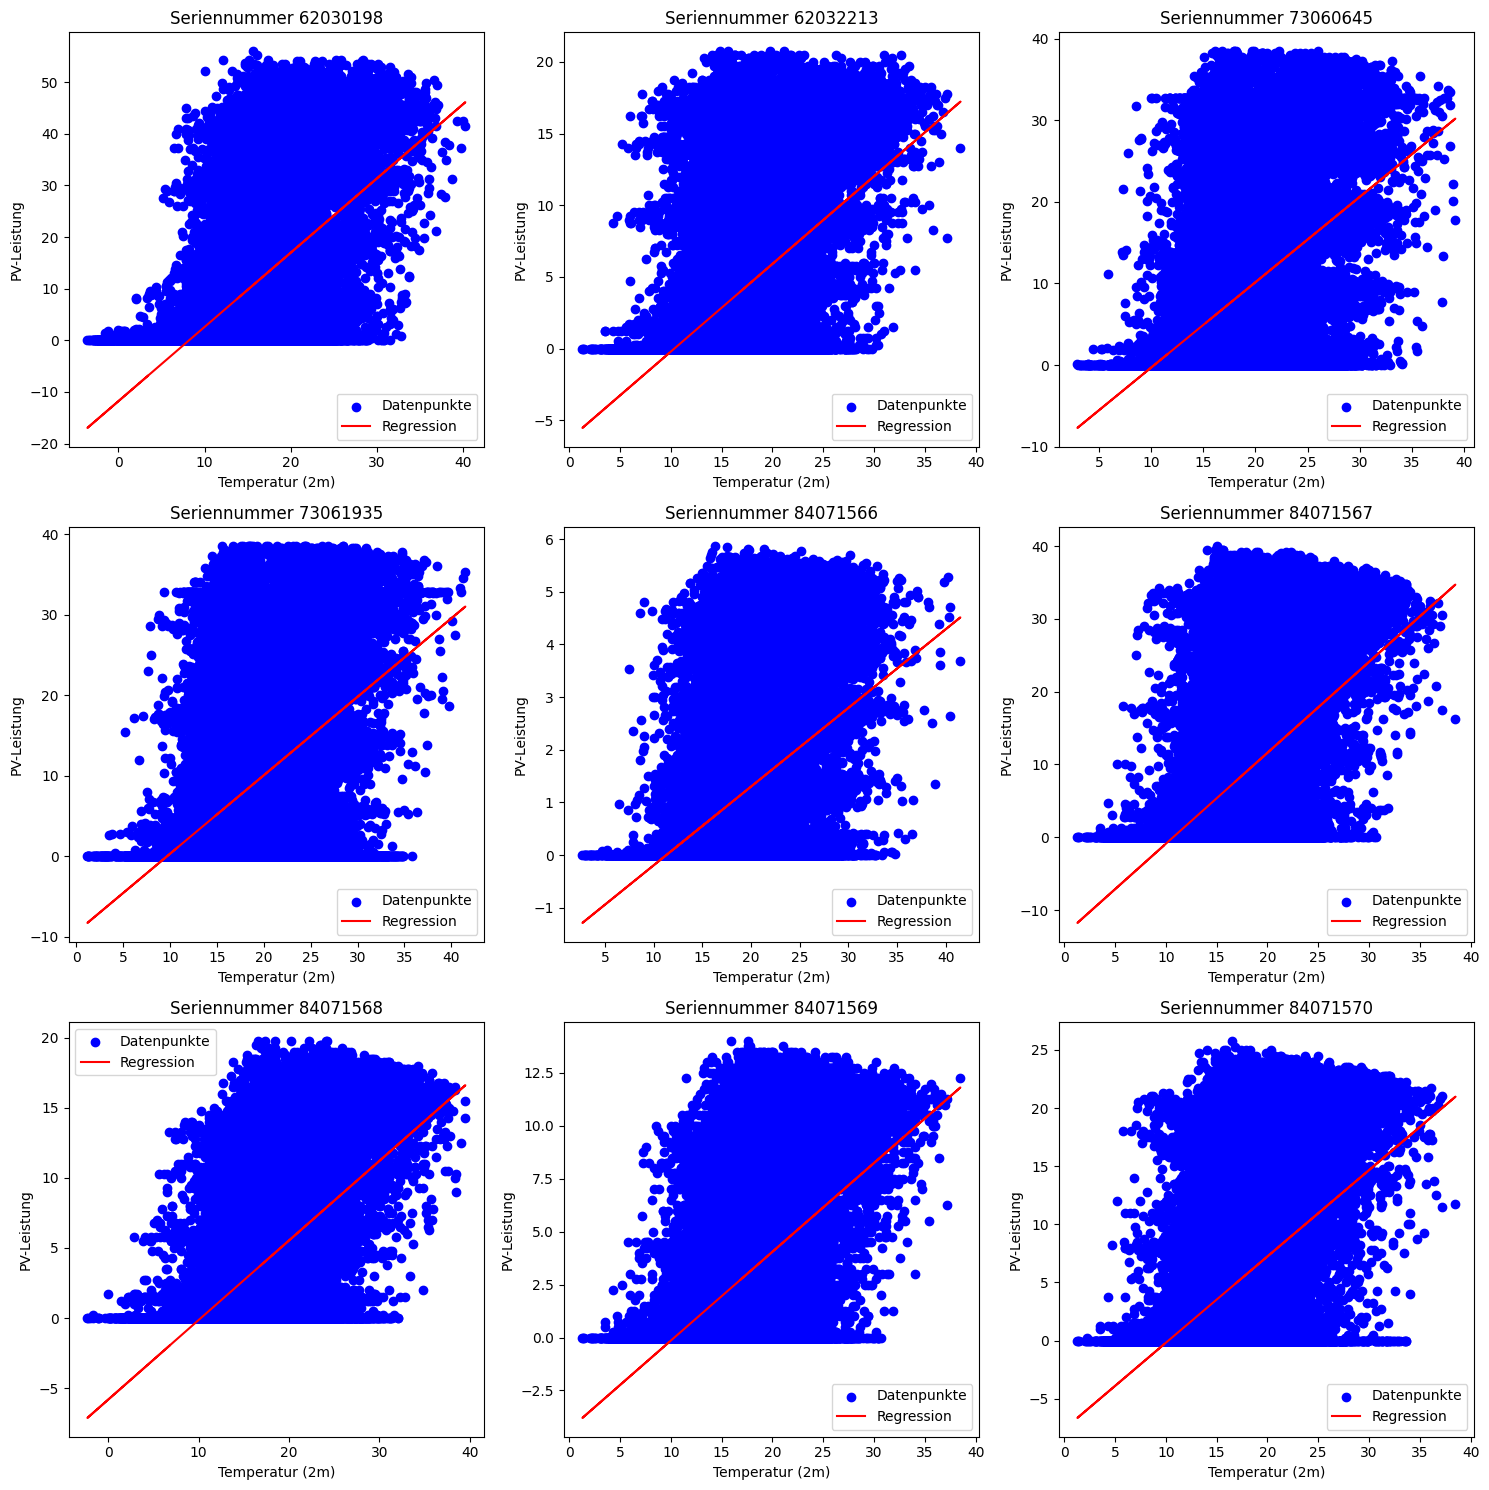

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (serial_number, gruppe) in enumerate(df.groupby('serial_number')):
    if idx >= len(axes):  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    ax = axes[idx]

    X = gruppe['temperature_2m_celsius'].values.reshape(-1, 1)
    y = gruppe['produced_energy_kwh'].values

    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatterplot und Regressionslinie
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, y_pred, color='red', label='Regression')
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Temperatur (2m)")
    ax.set_ylabel("PV-Leistung")
    ax.legend()

# Unbenutzte Plots ausblenden
for idx in range(count_serial_number, len(axes)):
    fig.delaxes(axes[idx])

# Layout optimieren
plt.tight_layout()
plt.show()

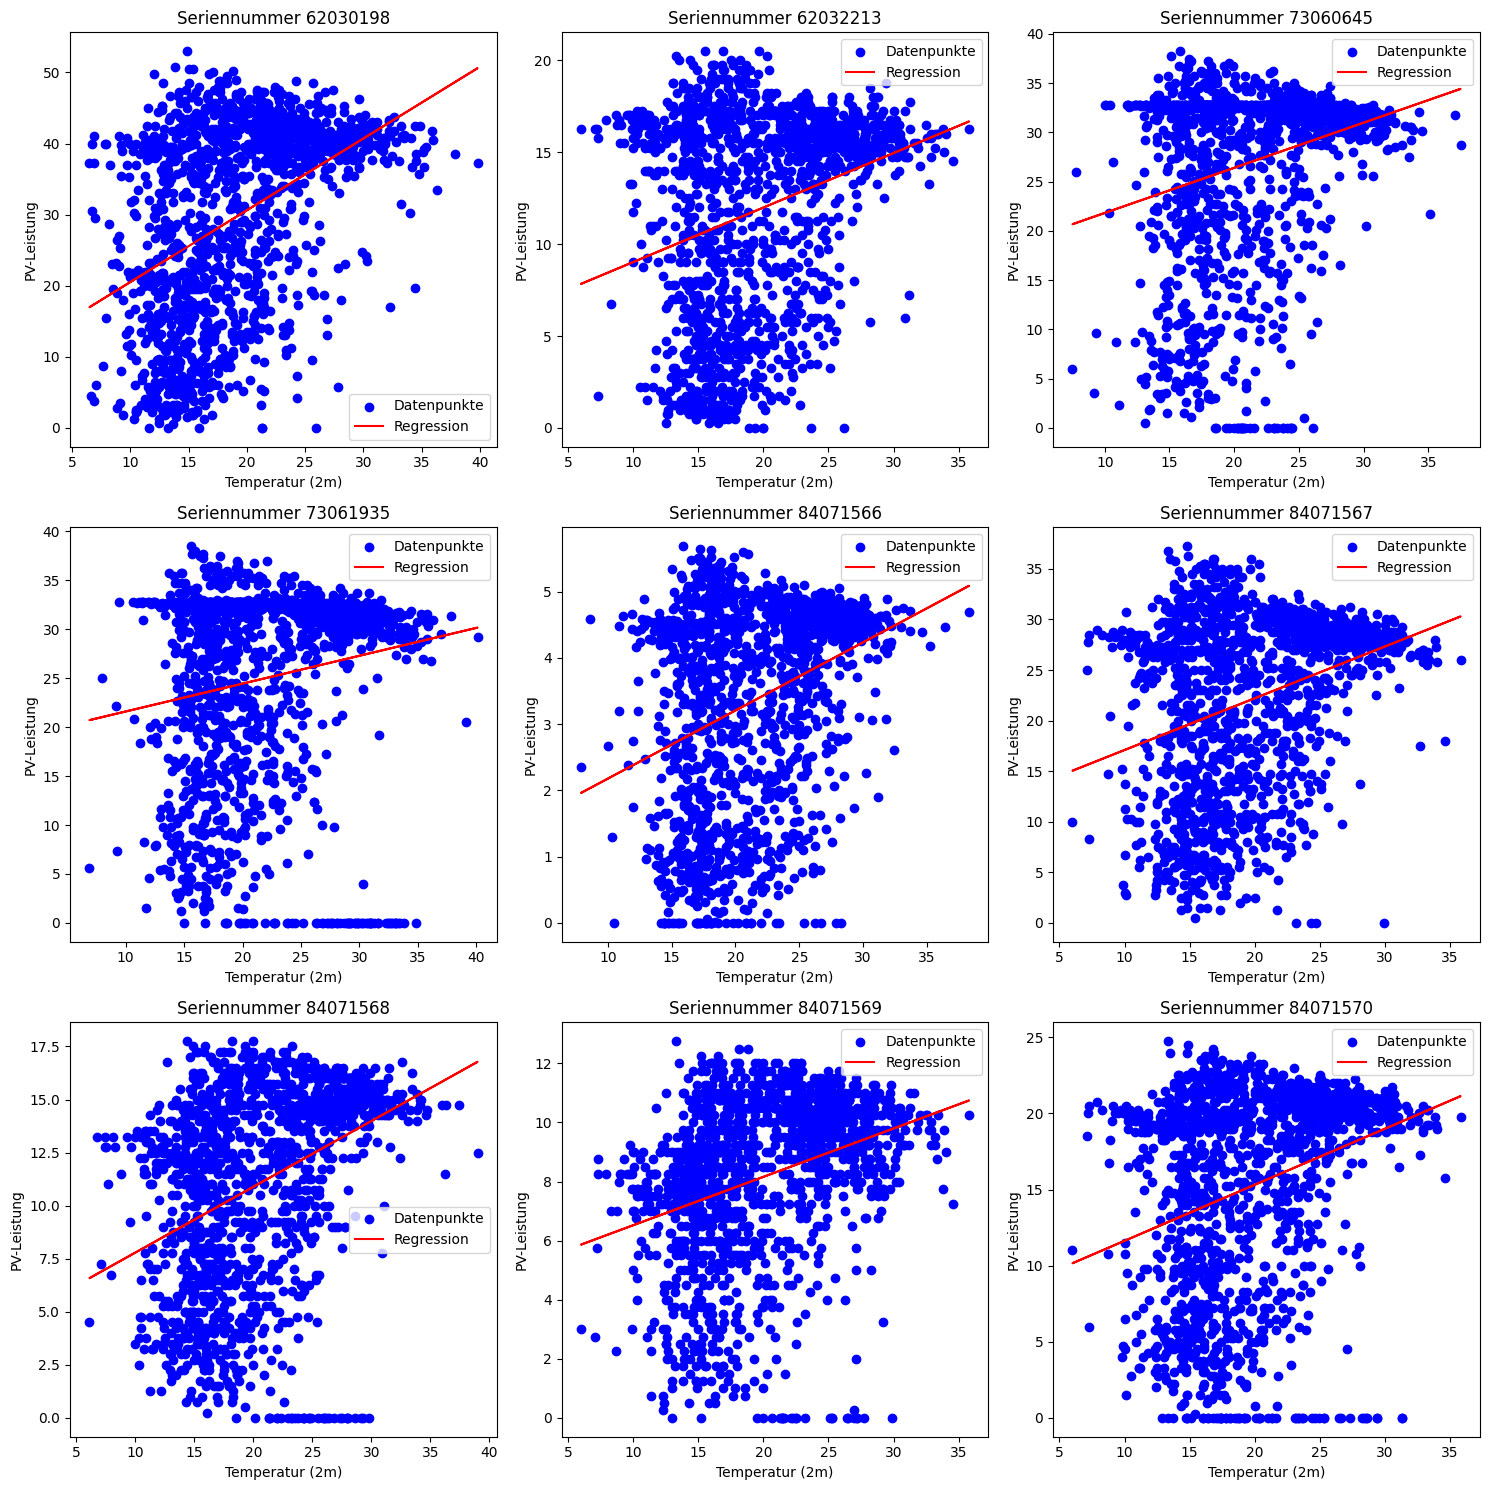

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (serial_number, gruppe) in enumerate(df_12pm.groupby('serial_number')):
    if idx >= len(axes):  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    ax = axes[idx]

    X = gruppe['temperature_2m_celsius'].values.reshape(-1, 1)
    y = gruppe['produced_energy_kwh'].values

    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatterplot und Regressionslinie
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, y_pred, color='red', label='Regression')
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Temperatur (2m)")
    ax.set_ylabel("PV-Leistung")
    ax.legend()

# Unbenutzte Plots ausblenden
for idx in range(count_serial_number, len(axes)):
    fig.delaxes(axes[idx])

# Layout optimieren
plt.tight_layout()
plt.show()